In [1]:
# import 
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# reading the data- 
# data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
# data.to_csv("data/Advertising.csv")

In [3]:
# reading the data from local system
data = pd.read_csv("data/Advertising.csv")

data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# converting first column to index
data = pd.read_csv("data/Advertising.csv", index_col=0)

data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
features = ['TV', 'Radio', 'Newspaper']
response = ['Sales']

X = data[features]
y = data[response]

print(X.head())
print(y.head())

      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
   Sales
1   22.1
2   10.4
3    9.3
4   18.5
5   12.9


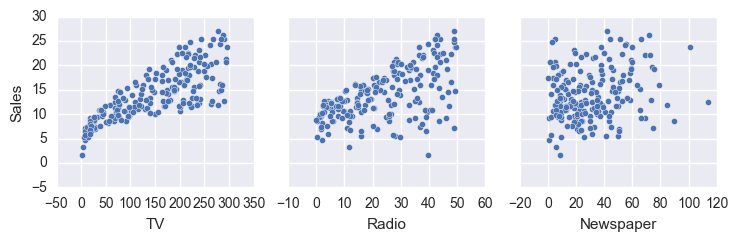

In [6]:
# plotting the relation between TV, Radio and Newspaper with Sales 
sns.pairplot(data=data, x_vars=features, y_vars=response)

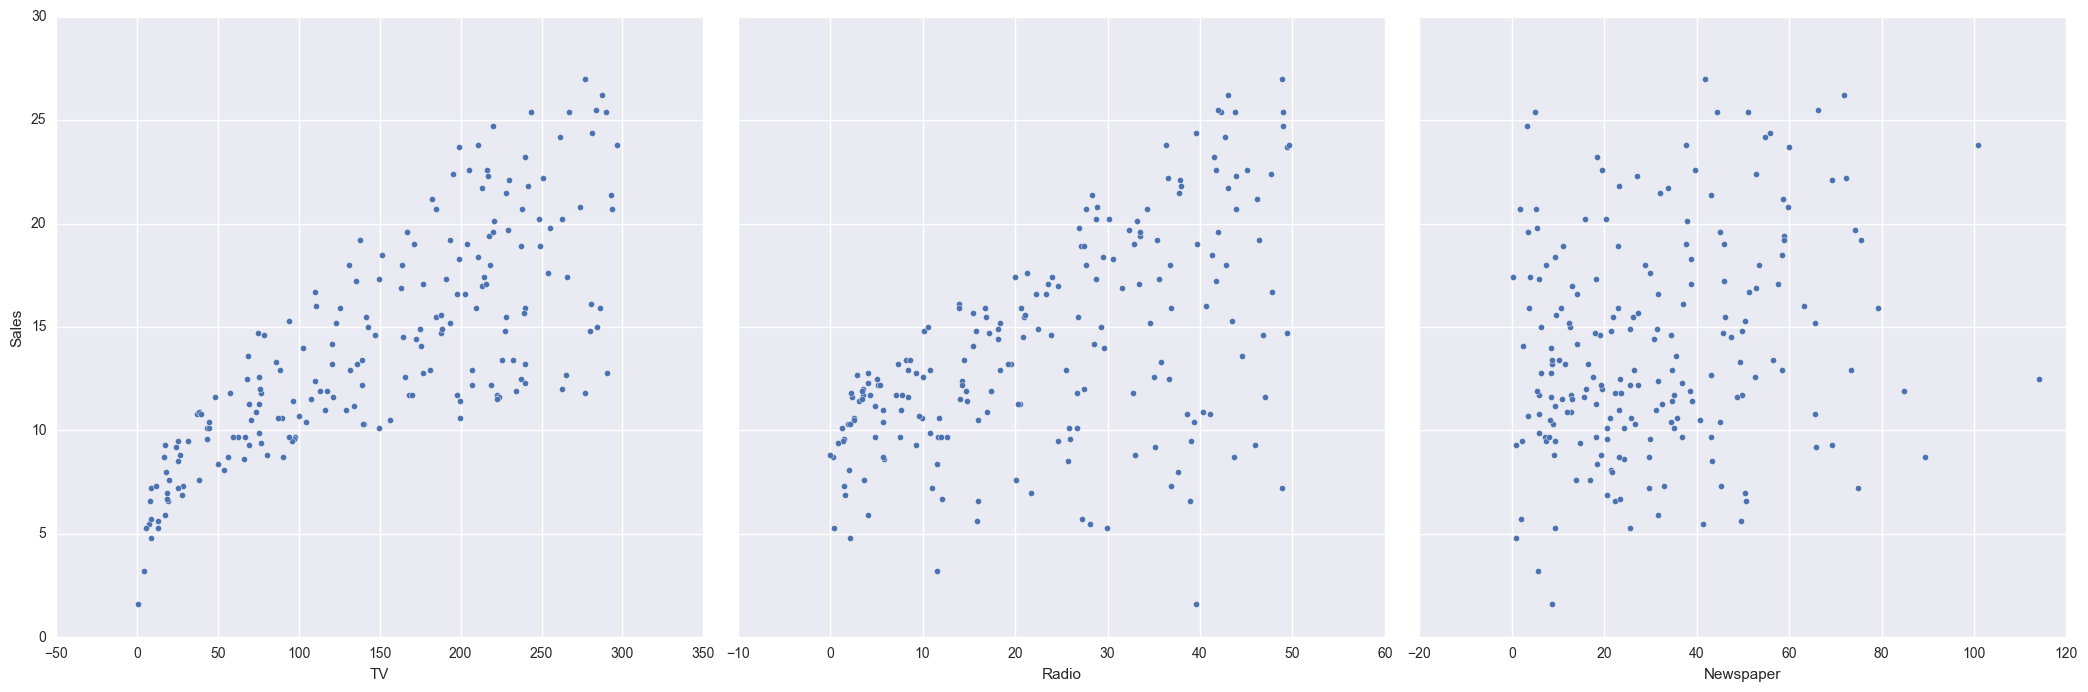

In [7]:
# increasing the size

# plotting the relation between TV, Radio and Newspaper with Sales 
sns.pairplot(data=data, x_vars=features, y_vars=response, size=7)

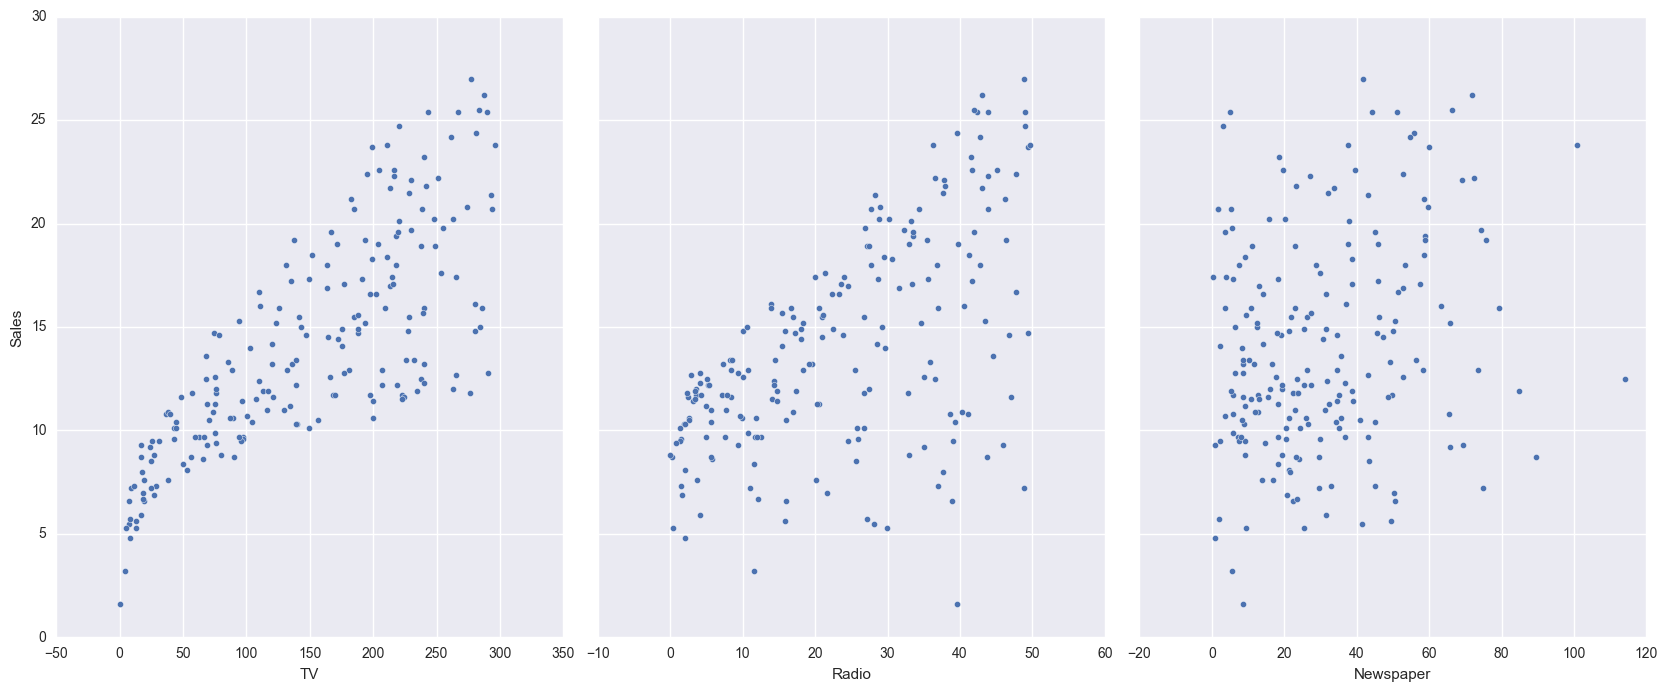

In [8]:
# increasing the size

# plotting the relation between TV, Radio and Newspaper with Sales 
sns.pairplot(data=data, x_vars=features, y_vars=response, size=7, aspect=0.8)

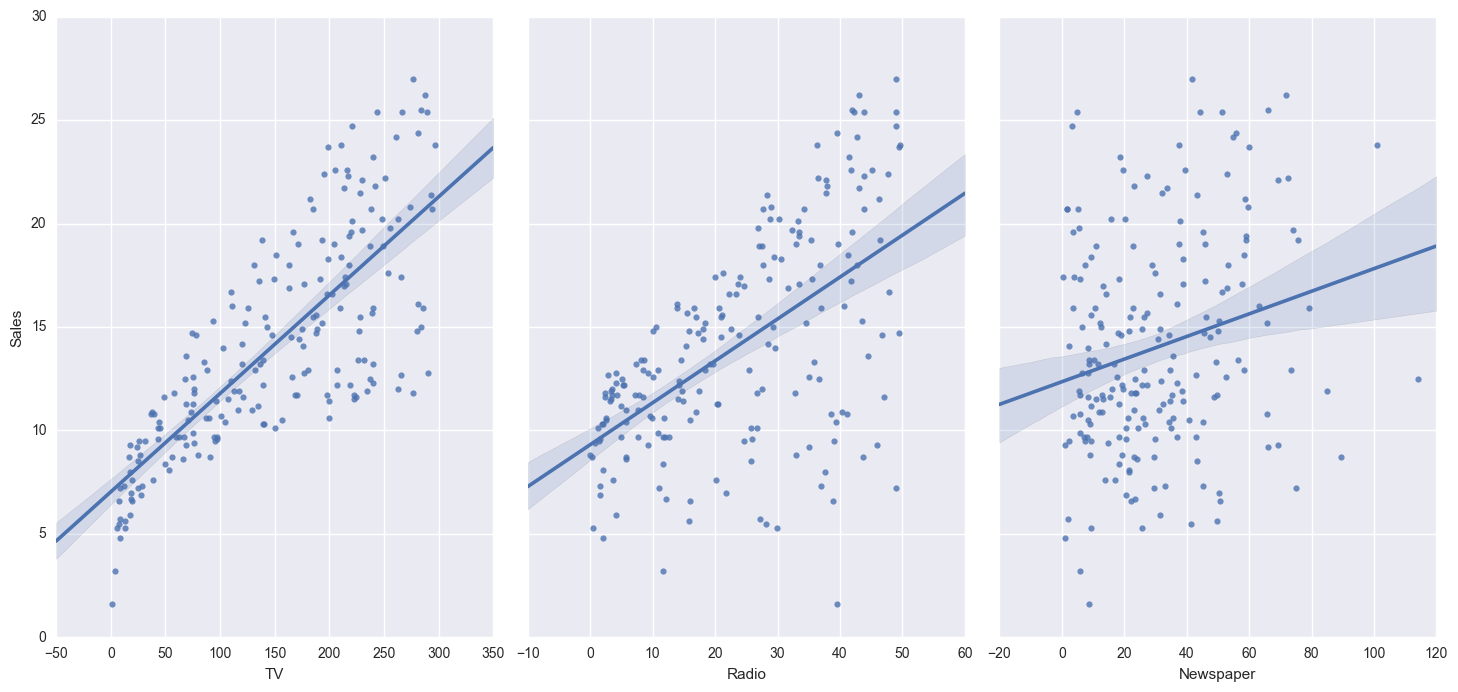

In [9]:
# increasing the size

# plotting the relation between TV, Radio and Newspaper with Sales 
sns.pairplot(data=data, x_vars=features, y_vars=response, size=7, aspect=0.7, kind='reg')

### Now doing the Linear Regression

In [10]:
# import
from sklearn.cross_validation import train_test_split
# from sklearn.metrics import accuracy_score   # not supported by continuous data so, not used in reg model

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
# using linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# checking the coefficient of Linear model
print(lr.intercept_)
print(lr.coef_)

[ 3.17916071]
[[ 0.045592    0.18627564 -0.00209332]]


In [13]:
# zip
coeff = zip(features, lr.coef_[0])
coeff

for x in coeff:
    print(x)

('TV', 0.045591997155548972)
('Radio', 0.18627564183655079)
('Newspaper', -0.0020933242039714861)


In [14]:
# predict
y_pred = lr.predict(X_test)

### Choosing Best model  - Calculating Errors

In [15]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [16]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [17]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [18]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.2474487139
12.2474487139


In [19]:
# Calculating RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.94933212834451

### RMSE help to choose the features

In [21]:
features = ['TV', 'Radio']
X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

np.sqrt(metrics.mean_absolute_error(y_test, y_pred))

1.0479704602267594